In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from collections import Counter

def predict(X_train, y_train, x_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        distances.append([distance, i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    return Counter(targets).most_common(1)[0][0]


In [2]:
def knn(X_train, y_train, X_test, z, k):
    if k > len(X_train):
        raise ValueError
    for i in range(len(X_test)):
        z.append(predict(X_train, y_train, X_test[i, :], k))
    

In [3]:
dig = load_digits()
X = dig.data
y = dig.target

np.random.seed(0)
indices = np.random.permutation(len(X))
X_train = X[indices[:-200]]
y_train = y[indices[:-200]]
X_test = X[indices[-200:]]
y_test = y[indices[-200:]]


In [4]:
z = []
try:
    knn(X_train, y_train, X_test, z, 7)
    z = np.asarray(z)
    accuracy = accuracy_score(y_test, z) * 100
    print('Accuracy of self made KNN: %d%%' %accuracy)

except ValueError:
    print('Cannot have more neighbors than training samples.')


Accuracy of self made KNN: 99%


In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test,pred) *100
print('Accuracy of sklearn KNN : %d%%'%acc)

Accuracy of sklearn KNN : 99%


Enter the data to be predicted : 234
[6]


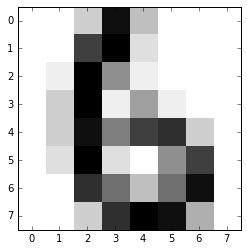

In [6]:
from sklearn import svm

def makearr(i):
      arr = np.array(X[i],ndmin=2)
      return arr

model = svm.SVC(gamma=0.0001,C=10)
model.fit(X_train,y_train)

i = int(input('Enter the data to be predicted : '))
a = makearr(i)
print(model.predict(a))

plt.imshow(dig.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()